## SCRIPT TO MAKE A NICE TABLE OUT OF RESULTS

In [75]:
import json 
import os
import ast
import pandas as pd
import matplotlib.pyplot as plt


In [64]:
!cd webnlgResults/webnlg_semantic_results && ls

Instances_KG  Instances_list  multi_Subclasses_KG  Subclasses_KG  Types_KG


In [65]:
exp='webnlg_semantic_results'
#exp_columns=['entities_list','semantic_of_news']
exp_columns=['Instances_KG' , 'Instances_list' , 'multi_Subclasses_KG' , 'Subclasses_KG' , 'Types_KG']
results=[]
for i in exp_columns:
    path=f'./webnlgResults/{exp}/{i}/output_metrics.txt'

    with open(path) as f:
        data = f.read()
    data=data.split('\n')#print(type(data))
    data=[ast.literal_eval(x) for x in data if x!=''][1:]#remove empty lines and the first 
    #print(data)
    #results.append(data)
    planner=i
    bluu=data[0]['bleu']
    google_bleu=data[1]['google_bleu']
    meteor=data[2]['meteor']
    bertscore=data[3]['Bert_Score']['f1']
    bleurt=data[4]['scores']
    parent_score=data[5]['PARENT']['f_score']
    training_duration=data[6]['time(s)']
    gpuUSED=data[7]['gpu']

    scores=[i,bluu,google_bleu,meteor,bertscore,bleurt,parent_score,training_duration,gpuUSED]
    results.append(scores)
    for score in data:
        print(score)

    d1=pd.DataFrame(data)
    #d1
    #d1.columns=['bleu','google_bleu','meteor','bertscore','bleurt','parent_score','training_duration','gpuUSED']


In [67]:
columns=['planner','bleu','google_bleu','meteor','bertscore(f1)','bleurt','parent_score(f)','training_duration','gpuUSED']

df1=pd.DataFrame(results,columns=columns)
df1


,planner,bleu,google_bleu,meteor,bertscore(f1),bleurt,parent_score(f),training_duration,gpuUSED
0,Instances_KG,0.198987,0.229753,0.453807,0.844233,-0.278254,0.291786,1101.558150,15634
1,Instances_list,0.216719,0.246773,0.450992,0.843649,-0.310406,0.301713,758.625808,15896
2,multi_Subclasses_KG,0.187703,0.215277,0.437976,0.835864,-0.347711,0.285105,928.461103,15896
3,Subclasses_KG,0.209347,0.232486,0.439949,0.835657,-0.385143,0.291871,748.174505,15896
4,Types_KG,0.223235,0.247509,0.446778,0.841952,-0.303399,0.299701,769.640911,15896


## GRAPHS

In [64]:
names=os.listdir('./gridsearch_results/Instances')
names

['0.0003_5_3_output_metrics.json',
 '0.0005_5_3_output_metrics.json',
 '1e-05_3_3_output_metrics.json',
 '3e-06_3_3_output_metrics.json',
 '5e-05_5_3_output_metrics.json',
 '1e-05_1_3_output_metrics.json',
 '0.0005_1_3_output_metrics.json',
 '5e-05_3_3_output_metrics.json',
 '5e-05_1_3_output_metrics.json',
 '3e-06_5_3_output_metrics.json',
 '3e-06_1_3_output_metrics.json',
 '1e-05_5_3_output_metrics.json',
 '0.0001_5_3_output_metrics.json',
 '0.0003_3_3_output_metrics.json',
 '0.0001_3_3_output_metrics.json',
 '3e-05_1_3_output_metrics.json',
 '0.0003_1_3_output_metrics.json',
 '3e-05_5_3_output_metrics.json',
 '3e-05_3_3_output_metrics.json',
 '0.0005_3_3_output_metrics.json',
 '0.0001_1_3_output_metrics.json']

In [135]:
blues={}
bertscores={}
meteors={}
bleurts={}
for n in names:
    with open(f'./gridsearch_results/Instances/{n}','r') as f:
        scores = json.load(f)
        vals=n.split('_output_')[0]
        #print(vals)        #print(scores[1])
        blues[vals]=scores[1]['bleu']
        bertscores[vals]=scores[4]['Bert_Score']['f1']
        meteors[vals]=scores[3]['meteor']
        bleurts[vals]=scores[5]['bleurt_score']
    



{'1e-05_3_3': 0.2303552952041102, '3e-05_3_3': 0.2319262736458347, '3e-05_5_3': 0.23356801912154768, '5e-05_3_3': 0.23451864132376346, '3e-05_1_3': 0.2364451888288815, '0.0005_1_3': 0.24744617344992884, '0.0003_5_3': 0.25486888139364217, '0.0003_3_3': 0.26152277559072157, '0.0003_1_3': 0.27129206884413787, '0.0001_5_3': 0.30033110052876233, '0.0001_3_3': 0.30084670744665, '0.0001_1_3': 0.30131040573237944}


<BarContainer object of 12 artists>

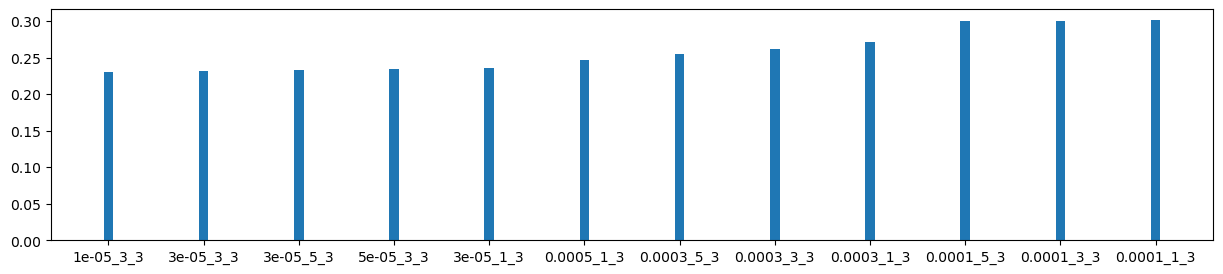

In [126]:

blues={k: v for k, v in sorted(blues.items(), key=lambda item: item[1]) if v>0.23}
print(blues)

# Data for plotting
plt.figure(figsize=(15, 3))  # width:20, height:3
plt.bar((blues.keys()),blues.values(),width=0.1)
#plt.bar(range(len(my_dict)), my_dict.values(), align='edge', width=0.3)


(0.7, 1.0)

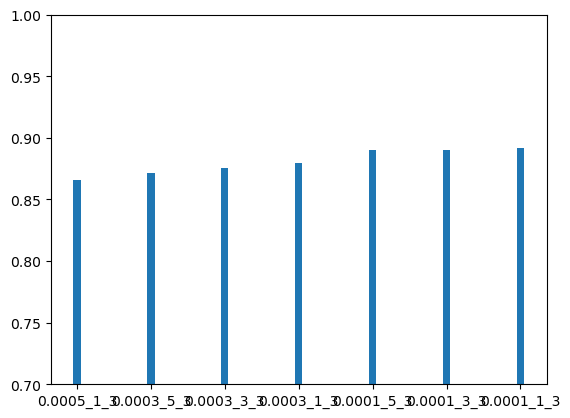

In [128]:
bertscores={k: v for k, v in sorted(bertscores.items(), key=lambda item: item[1]) if v>0.86 }
fig, ax = plt.subplots()

ax.bar((bertscores.keys()),bertscores.values(),width=0.1)

ax.set_ylim(0.7, 1)  # outliers only

<BarContainer object of 6 artists>

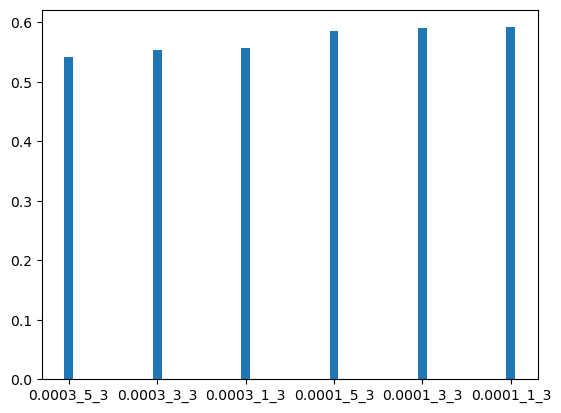

In [132]:
meteors={k: v for k, v in sorted(meteors.items(), key=lambda item: item[1]) if v>0.53 }
fig, ax = plt.subplots()
ax.bar((meteors.keys()),meteors.values(),width=0.1)

<BarContainer object of 6 artists>

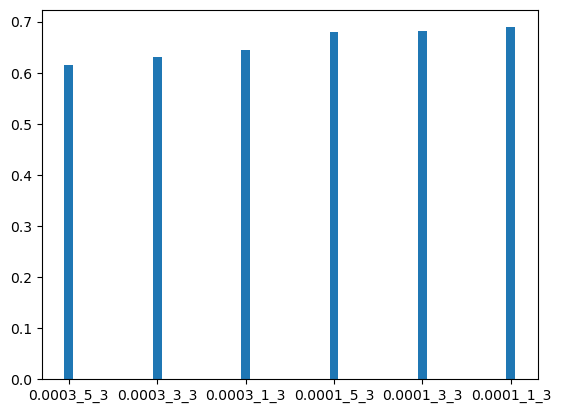

In [137]:
bleurts={k: v for k, v in sorted(bleurts.items(), key=lambda item: item[1]) if v>0.6 }
fig, ax = plt.subplots()
ax.bar((bleurts.keys()),bleurts.values(),width=0.1)